In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.2 MB/s 


In [ ]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics import accuracy_score, recall_score
from wordcloud import WordCloud  
from sklearn import svm

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/dataset baru manual.xlsx")

In [ ]:
data.head()

,Comment,Label
0,Kebijakan yang membuat masyarakat semakin terp...,Negatif
1,tidak jadi buat SIM. tidak jadi perpanjang STN...,Negatif
2,Jangan kau tanyakan apa yang telah negara beri...,Negatif
3,Gimana kok jadi ruwet gini...,Negatif
4,Bertambah lagi beban pengeluaran jadi punya hu...,Negatif


In [ ]:
data.Label.value_counts()

Negatif    2912
Positif     148
Name: Label, dtype: int64

## **Case Folding**

In [ ]:
def casefoldingText(text): # Converting all the characters in a text into lower case
  lower = text.lower()
  return lower

In [ ]:
data['Comment_Bersih'] = data['Comment'].apply(casefoldingText)

In [ ]:
data.head()

,Comment,Label,Comment_Bersih
0,Kebijakan yang membuat masyarakat semakin terp...,Negatif,kebijakan yang membuat masyarakat semakin terp...
1,tidak jadi buat SIM. tidak jadi perpanjang STN...,Negatif,tidak jadi buat sim. tidak jadi perpanjang stn...
2,Jangan kau tanyakan apa yang telah negara beri...,Negatif,jangan kau tanyakan apa yang telah negara beri...
3,Gimana kok jadi ruwet gini...,Negatif,gimana kok jadi ruwet gini...
4,Bertambah lagi beban pengeluaran jadi punya hu...,Negatif,bertambah lagi beban pengeluaran jadi punya hu...


## **Cleansing**

In [ ]:
def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
  text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
  text = re.sub(r"http\S+", '', text) # remove link
  text = re.sub(r'[0-9]+', '', text) # remove numbers
  text = text.replace('\n', ' ') # replace new line into space
  text = text.replace('<br>', ' ') # replace <br> into space
  text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
  text = text.strip(' ') # remove characters space from both left and right text
  return text

In [ ]:
data['Comment_Bersih'] = data['Comment_Bersih'].apply(cleaningText)

In [ ]:
data.head()

,Comment,Label,Comment_Bersih
0,Kebijakan yang membuat masyarakat semakin terp...,Negatif,kebijakan yang membuat masyarakat semakin terp...
1,tidak jadi buat SIM. tidak jadi perpanjang STN...,Negatif,tidak jadi buat sim tidak jadi perpanjang stnk...
2,Jangan kau tanyakan apa yang telah negara beri...,Negatif,jangan kau tanyakan apa yang telah negara beri...
3,Gimana kok jadi ruwet gini...,Negatif,gimana kok jadi ruwet gini
4,Bertambah lagi beban pengeluaran jadi punya hu...,Negatif,bertambah lagi beban pengeluaran jadi punya hu...


## **Tokenizng**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def tokenizingText(text):
  tokenize = word_tokenize(text)
  return tokenize

In [ ]:
data['Comment_Tokenizing'] = data['Comment_Bersih'].apply(tokenizingText)

In [ ]:
data.head()

,Comment,Label,Comment_Bersih,Comment_Tokenizing
0,Kebijakan yang membuat masyarakat semakin terp...,Negatif,kebijakan yang membuat masyarakat semakin terp...,"[kebijakan, yang, membuat, masyarakat, semakin..."
1,tidak jadi buat SIM. tidak jadi perpanjang STN...,Negatif,tidak jadi buat sim tidak jadi perpanjang stnk...,"[tidak, jadi, buat, sim, tidak, jadi, perpanja..."
2,Jangan kau tanyakan apa yang telah negara beri...,Negatif,jangan kau tanyakan apa yang telah negara beri...,"[jangan, kau, tanyakan, apa, yang, telah, nega..."
3,Gimana kok jadi ruwet gini...,Negatif,gimana kok jadi ruwet gini,"[gimana, kok, jadi, ruwet, gini]"
4,Bertambah lagi beban pengeluaran jadi punya hu...,Negatif,bertambah lagi beban pengeluaran jadi punya hu...,"[bertambah, lagi, beban, pengeluaran, jadi, pu..."


## **Filtering**

In [ ]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

In [ ]:
def stopwords_removal(words):
  return [word for word in words if word not in list_stopwords]

data['Comment_Tokenizing'] = data['Comment_Tokenizing'].apply(stopwords_removal)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
data.head()

,Comment,Label,Comment_Bersih,Comment_Tokenizing
0,Kebijakan yang membuat masyarakat semakin terp...,Negatif,kebijakan yang membuat masyarakat semakin terp...,"[kebijakan, masyarakat, terpuruk, seandai, nya..."
1,tidak jadi buat SIM. tidak jadi perpanjang STN...,Negatif,tidak jadi buat sim tidak jadi perpanjang stnk...,"[sim, perpanjang, stnk, jual, tanahgimana]"
2,Jangan kau tanyakan apa yang telah negara beri...,Negatif,jangan kau tanyakan apa yang telah negara beri...,"[kau, negara, padamu, tanyakanlah, kau, negara..."
3,Gimana kok jadi ruwet gini...,Negatif,gimana kok jadi ruwet gini,"[gimana, ruwet, gini]"
4,Bertambah lagi beban pengeluaran jadi punya hu...,Negatif,bertambah lagi beban pengeluaran jadi punya hu...,"[bertambah, beban, pengeluaran, hutang, bulana..."


## **Stemming**

In [ ]:
def stemmingText(text):
  # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = [stemmer.stem(word) for word in text]
  return text 

In [ ]:
data['Comment_Tokenizing'] = data['Comment_Tokenizing'].apply(stemmingText)

In [ ]:
data.head()

,Comment,Label,Comment_Bersih,Comment_Tokenizing
0,Kebijakan yang membuat masyarakat semakin terp...,Negatif,kebijakan yang membuat masyarakat semakin terp...,"[bijak, masyarakat, puruk, anda, nya, obat, bl..."
1,tidak jadi buat SIM. tidak jadi perpanjang STN...,Negatif,tidak jadi buat sim tidak jadi perpanjang stnk...,"[sim, panjang, stnk, jual, tanahgimana]"
2,Jangan kau tanyakan apa yang telah negara beri...,Negatif,jangan kau tanyakan apa yang telah negara beri...,"[kau, negara, pada, tanya, kau, negara, kaleng..."
3,Gimana kok jadi ruwet gini...,Negatif,gimana kok jadi ruwet gini,"[gimana, ruwet, gin]"
4,Bertambah lagi beban pengeluaran jadi punya hu...,Negatif,bertambah lagi beban pengeluaran jadi punya hu...,"[tambah, beban, keluar, hutang, bulan, keluarga]"


In [ ]:
#from google.colab import drive
#drive.mount('/drive')
#data.to_csv('/drive/My Drive/SesudahProcessing2.csv')

In [ ]:
from wordcloud import WordCloud,STOPWORDS

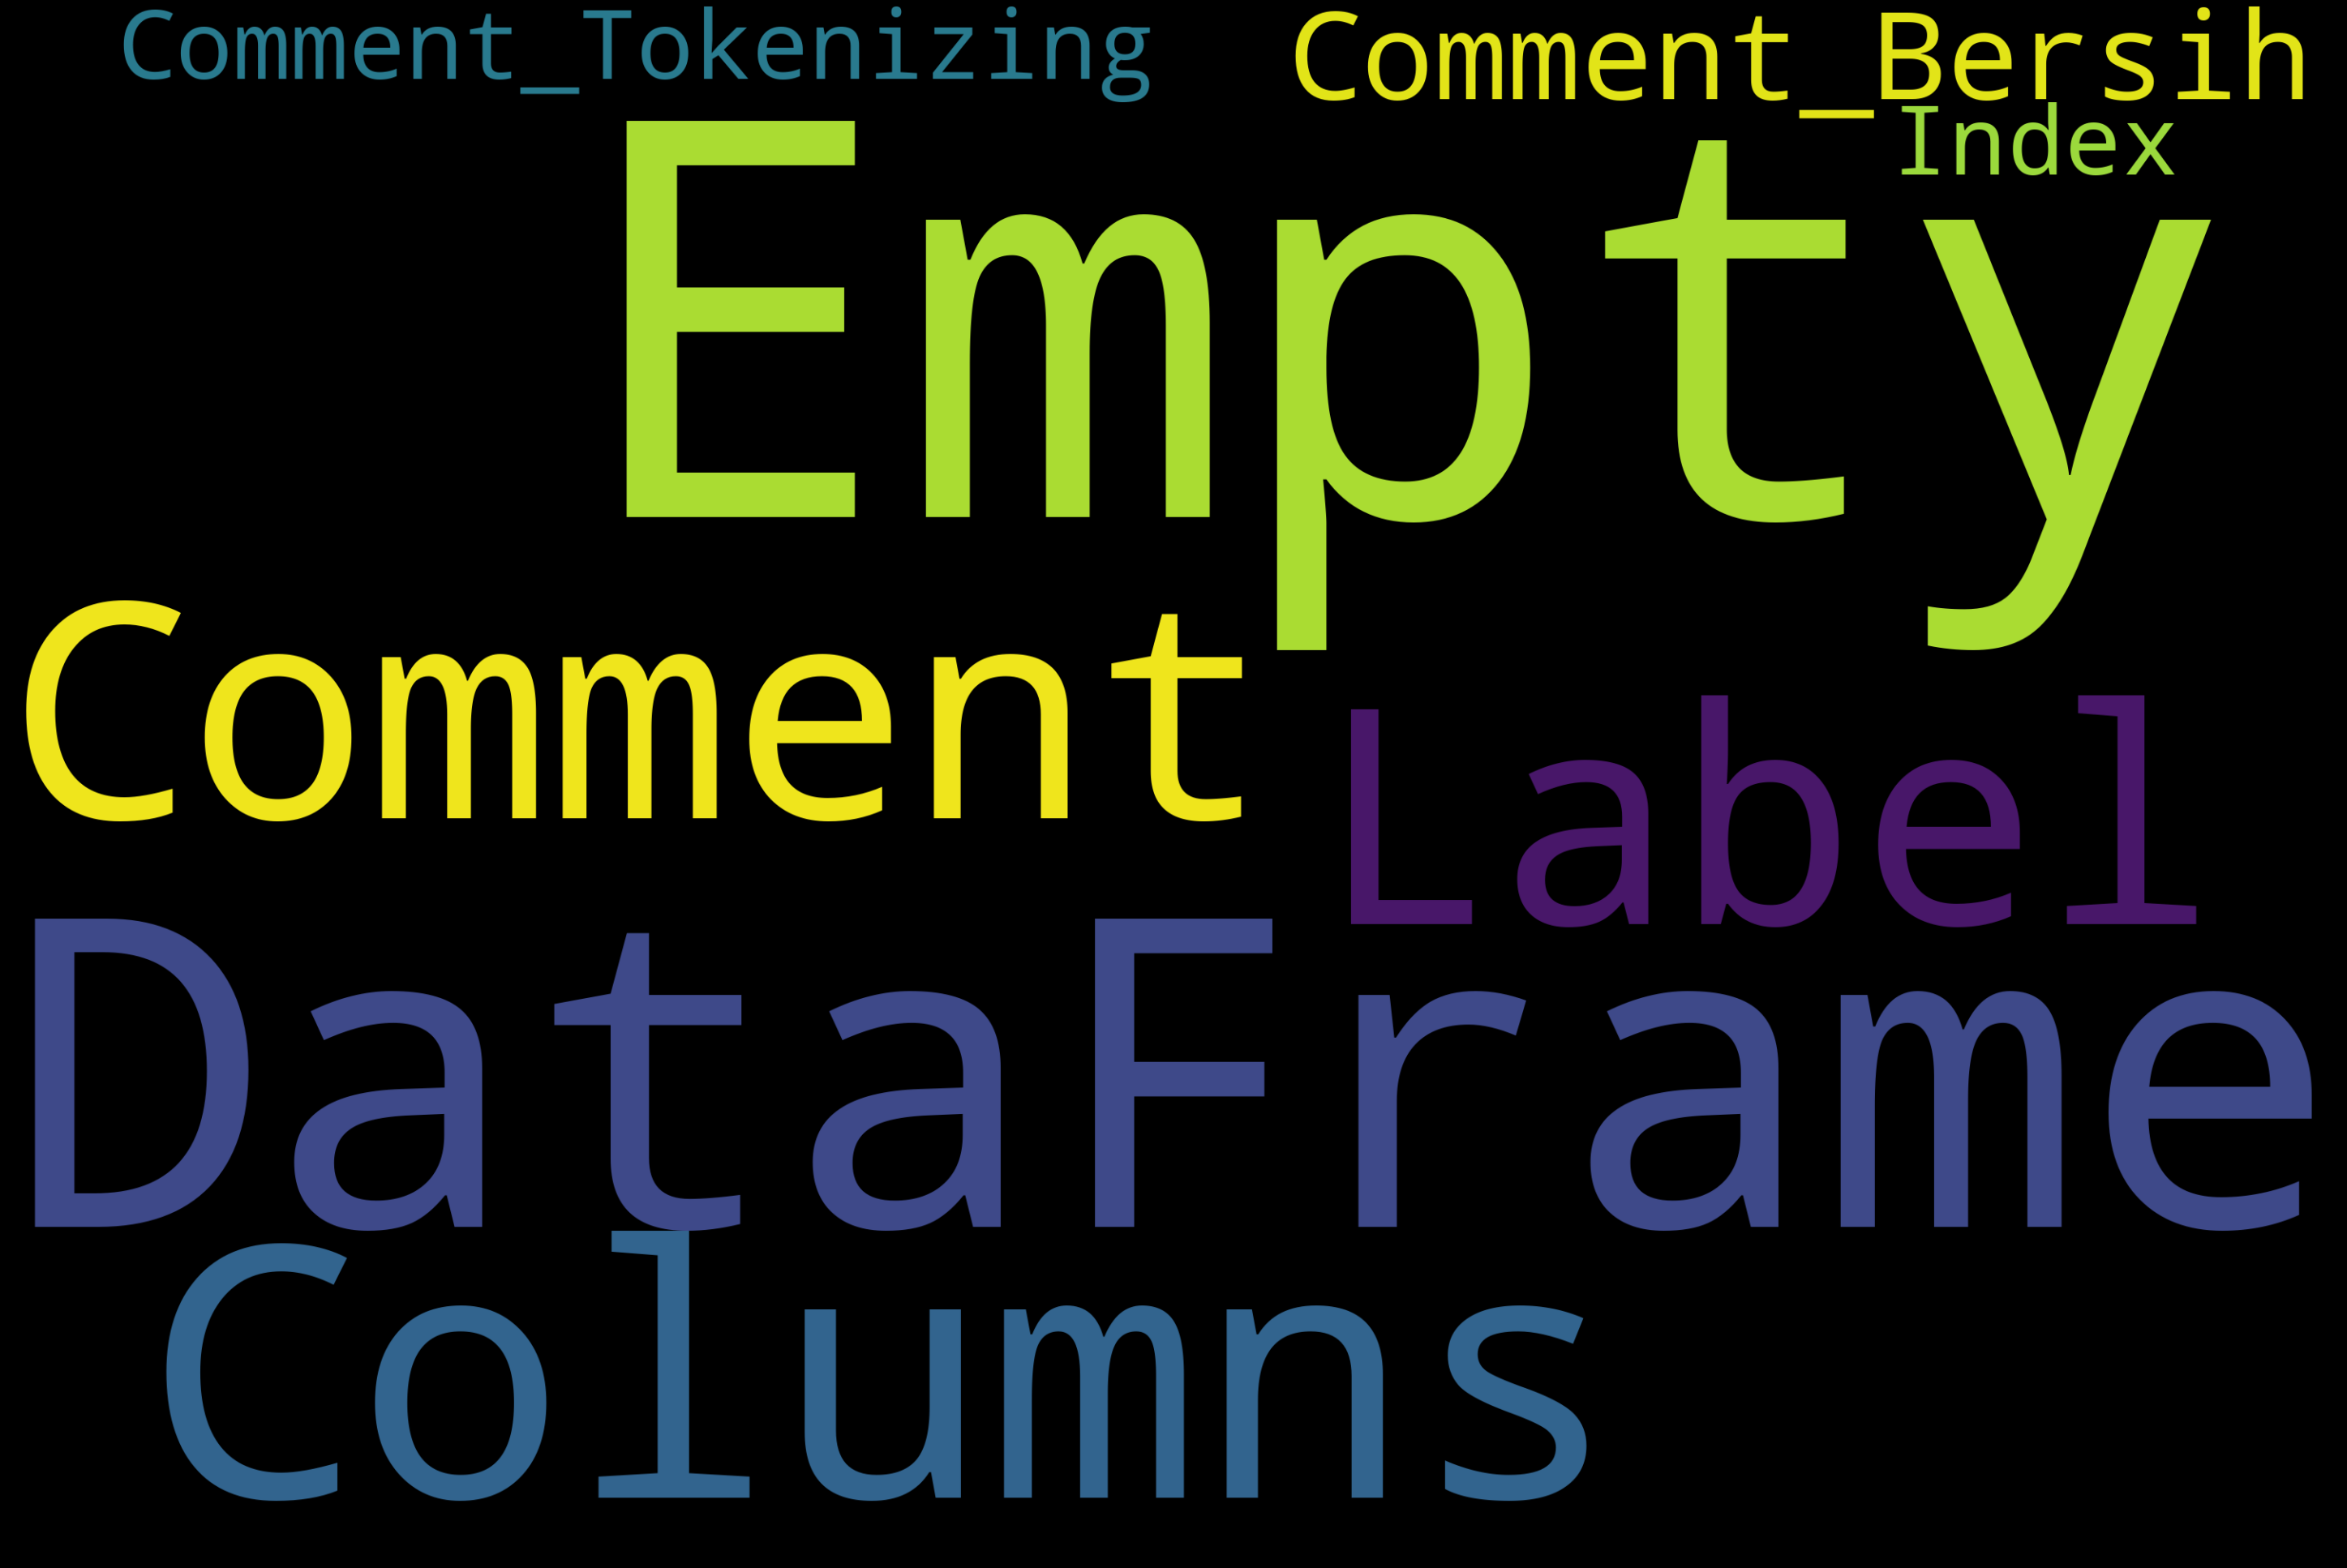

In [ ]:
text = data[data["Label"]==1]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

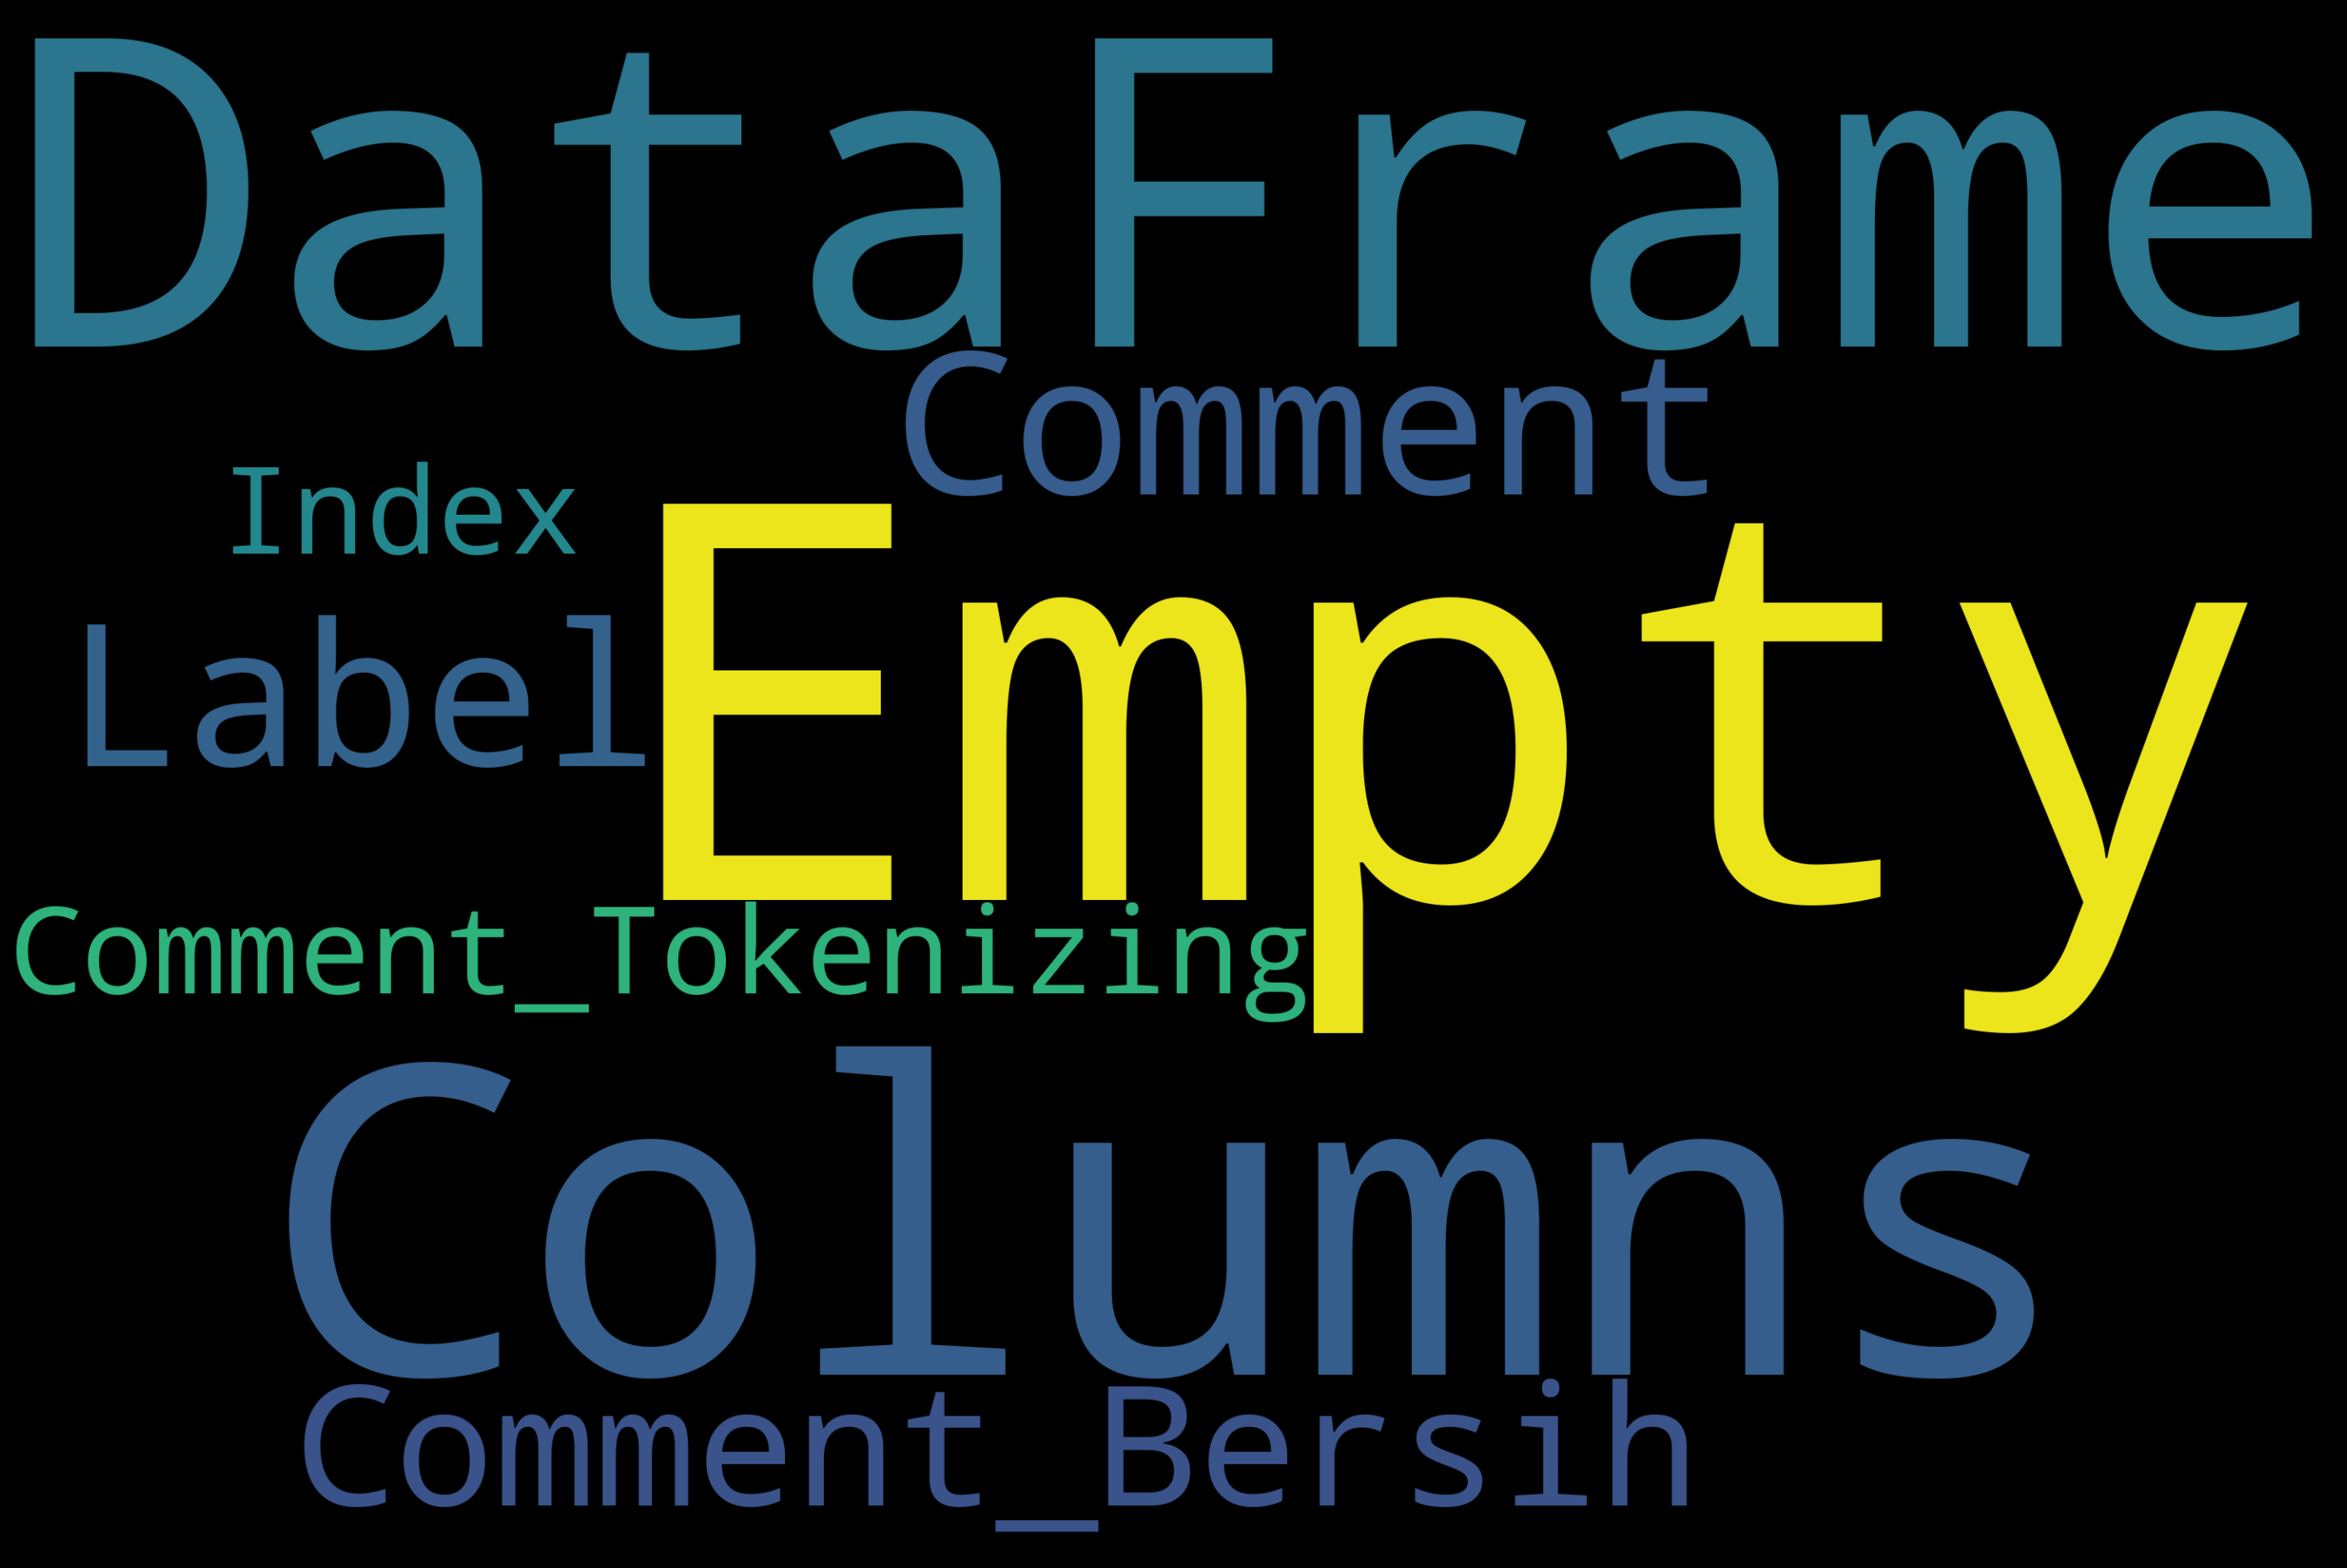

In [ ]:
text = data[data["Label"]== 0]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
Label = []
for index, row in data.iterrows():
  if row["Label"]=="Positif":
    Label.append(1)
  else:
    Label.append(0)

data["Label"]=Label
data

,Comment,Label,Comment_Bersih,Comment_Tokenizing
0,Kebijakan yang membuat masyarakat semakin terp...,0,kebijakan yang membuat masyarakat semakin terp...,"[bijak, masyarakat, puruk, anda, nya, obat, bl..."
1,tidak jadi buat SIM. tidak jadi perpanjang STN...,0,tidak jadi buat sim tidak jadi perpanjang stnk...,"[sim, panjang, stnk, jual, tanahgimana]"
2,Jangan kau tanyakan apa yang telah negara beri...,0,jangan kau tanyakan apa yang telah negara beri...,"[kau, negara, pada, tanya, kau, negara, kaleng..."
3,Gimana kok jadi ruwet gini...,0,gimana kok jadi ruwet gini,"[gimana, ruwet, gin]"
4,Bertambah lagi beban pengeluaran jadi punya hu...,0,bertambah lagi beban pengeluaran jadi punya hu...,"[tambah, beban, keluar, hutang, bulan, keluarga]"
...,...,...,...,...
3055,Semoga Berita Positif ini tidak menjadi berita...,1,semoga berita positif ini tidak menjadi berita...,"[moga, berita, positif, berita, negatif]"
3056,"Setuju sebagai dasar Pelayanan Rakyat Kecil, S...",1,setuju sebagai dasar pelayanan rakyat kecil se...,"[tuju, dasar, layan, rakyat, dasar, tentu, blt..."
3057,"Kalo mau semua orang ikut BPJS gampang, naikin...",1,kalo mau semua orang ikut bpjs gampang naikin ...,"[kalo, orang, bpjs, gampang, naikin, kesejahtr..."
3058,seharusnya BPJS kaitannya di instansi kesehata...,0,seharusnya bpjs kaitannya di instansi kesehata...,"[bpjs, kait, instansi, sehat, layan, gak, laya..."


In [ ]:
# Now we'll create our model 
import gensim
import time

model_w2v = gensim.models.Word2Vec(
            data['Comment_Tokenizing'],
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(data, total_examples= len(data['Comment_Bersih']), epochs=20)

(360, 880)

In [ ]:
model_w2v.wv.most_similar(positive="gotong")

[('mulu', 0.9998522996902466),
 ('hitung', 0.9998505711555481),
 ('kah', 0.9998491406440735),
 ('no', 0.9998447895050049),
 ('bunga', 0.9998414516448975),
 ('belit', 0.9998408555984497),
 ('janji', 0.9998407959938049),
 ('cash', 0.9998384118080139),
 ('kesan', 0.9998382925987244),
 ('kamar', 0.9998382329940796)]

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(data['Comment_Tokenizing']), 200)) 
for i in range(len(data['Comment_Tokenizing'])):
    wordvec_arrays[i,:] = word_vector(data['Comment_Tokenizing'][i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(3060, 200)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
x_train,x_test,y_train,y_test = train_test_split(wordvec_df,data['Label'],test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2448, 200)
(612, 200)
(2448,)
(612,)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Kernel Linear Non SMOTE**

In [ ]:
from sklearn.svm import SVC

In [ ]:
start = time.time() 

svm_classifierln = SVC(kernel='linear', C=2.33, probability=True)
svm_classifierln.fit(x_train,y_train)
y_pred1 = svm_classifierln.predict(x_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 0.59 seconds


In [ ]:
svnsmln = round(accuracy_score(y_test, y_pred1),2)
print('AKurasi Kernel Linear:',svnsmln)

AKurasi Kernel Linear: 0.96


Confusion matrix, without normalization


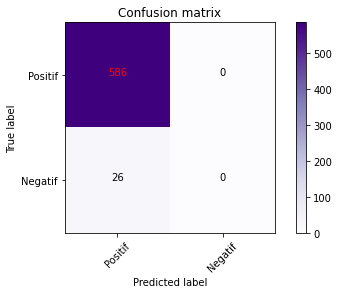

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       586
           1       0.00      0.00      0.00        26

    accuracy                           0.96       612
   macro avg       0.48      0.50      0.49       612
weighted avg       0.92      0.96      0.94       612



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Kernel RBF Non SMOTE**

In [ ]:
start = time.time() 

svm_classifierrb = SVC(kernel='rbf', C=2.33, gamma=0.45, probability=True)
svm_classifierrb.fit(x_train,y_train)
y_pred2 = svm_classifierrb.predict(x_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 0.88 seconds


In [ ]:
svnsmrb = round(accuracy_score(y_test, y_pred2),2)
print('AKurasi Kernel Linear:',svnsmrb)

AKurasi Kernel Linear: 0.96


Confusion matrix, without normalization


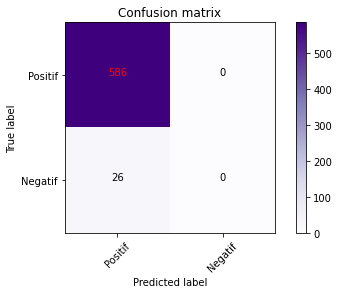

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       586
           1       0.00      0.00      0.00        26

    accuracy                           0.96       612
   macro avg       0.48      0.50      0.49       612
weighted avg       0.92      0.96      0.94       612



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Kernel Sigmoid Non SMOTE**

In [ ]:
start = time.time() 

svm_classifiersg = SVC(kernel='sigmoid', C=2.33, probability=True)
svm_classifiersg.fit(x_train,y_train)
y_pred3 = svm_classifiersg.predict(x_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 0.58 seconds


In [ ]:
svnsmsg = round(accuracy_score(y_test, y_pred3),2)
print('AKurasi Kernel Linear:',svnsmsg)

AKurasi Kernel Linear: 0.96


Confusion matrix, without normalization


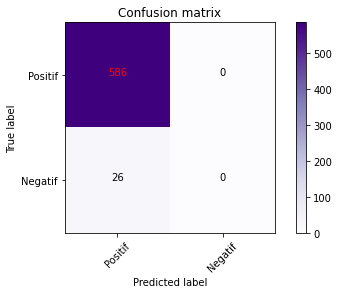

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred3))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       586
           1       0.00      0.00      0.00        26

    accuracy                           0.96       612
   macro avg       0.48      0.50      0.49       612
weighted avg       0.92      0.96      0.94       612



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Kernel Polynomial Non SMOTE**

In [ ]:
start = time.time() 

svm_classifierpl = SVC(kernel='sigmoid', C=2.33, probability=True)
svm_classifierpl.fit(x_train,y_train)
y_pred4 = svm_classifierpl.predict(x_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 0.58 seconds


In [ ]:
svnsmpl = round(accuracy_score(y_test, y_pred3),2)
print('AKurasi Kernel Polynomial:',svnsmpl)

AKurasi Kernel Polynomial: 0.96


Confusion matrix, without normalization


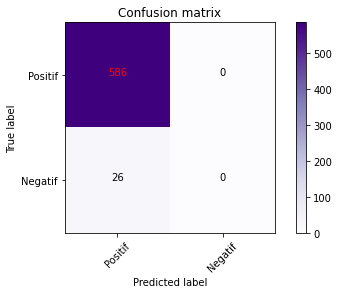

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_pred4)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred4))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       586
           1       0.00      0.00      0.00        26

    accuracy                           0.96       612
   macro avg       0.48      0.50      0.49       612
weighted avg       0.92      0.96      0.94       612



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


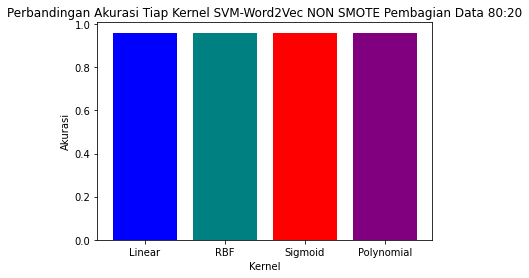

In [ ]:
kernel = ['Linear', 'RBF','Sigmoid','Polynomial']
model = [svnsmln,svnsmrb,svnsmsg,svnsmpl]
ncolors = ['blue', 'teal', 'red', 'purple']

plt.bar(kernel, model, color=ncolors)
plt.title('Perbandingan Akurasi Tiap Kernel SVM-Word2Vec NON SMOTE Pembagian Data 80:20')
plt.xlabel('Kernel')
plt.ylabel('Akurasi')
plt.show()

## **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from collections import Counter

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(wordvec_df, data['Label'])

print(f'Resampled dataset shape {Counter(y_res)}')
print(data.Label.value_counts())

Resampled dataset shape Counter({0: 2912, 1: 2912})
0    2912
1     148
Name: Label, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4659, 200)
(4659,)
(1165, 200)
(1165,)


## **SVM Kenel Linear**

In [ ]:
start = time.time() 

svm_classifierSM = SVC(kernel='linear', C=2.33, probability=True)
svm_classifierSM.fit(X_train,y_train)
y_predsm = svm_classifierSM.predict(X_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 12.47 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(svm_classifierSM,X_train,y_train,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.6695279  0.68669528 0.63519313 0.69957082 0.67596567 0.71030043
 0.66309013 0.6888412  0.64377682 0.66236559]
Mean: 0.674 (0.022)


In [ ]:
accusm = round(accuracy_score(y_test, y_predsm),2)
print('Milai Akurasinya adalah : ',accusm)
print(f'Nilai F1 Score adalah {round(f1_score(y_test, y_predsm),2)}')
print(f'Nilai Recall adalah {round(recall_score(y_test, y_predsm),2)}')

Milai Akurasinya adalah :  0.71
Nilai F1 Score adalah 0.7
Nilai Recall adalah 0.69


Confusion matrix, without normalization


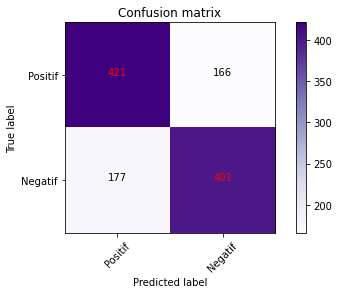

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_predsm)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_predsm))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       587
           1       0.71      0.69      0.70       578

    accuracy                           0.71      1165
   macro avg       0.71      0.71      0.71      1165
weighted avg       0.71      0.71      0.71      1165



## **SVM Kernel RBF**

In [ ]:
start = time.time() 

svm_classifierSMRB = SVC(kernel='rbf', C=2.33, gamma=0.45, probability=True)
svm_classifierSMRB.fit(X_train,y_train)
y_predrb = svm_classifierSMRB.predict(X_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 18.05 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
cv_scores = cross_val_score(svm_classifierSMRB,X_train,y_train,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.65879828 0.65450644 0.63948498 0.68454936 0.66738197 0.72317597
 0.6888412  0.63090129 0.60729614 0.69677419]
Mean: 0.665 (0.033)


In [ ]:
accusmrb = round(accuracy_score(y_test, y_predrb),2)
print('Akurasi kernel rbf :',accusmrb)
print(f'F1 Score is {round(f1_score(y_test, y_predrb),2)}')

Akurasi kernel rbf : 0.71
F1 Score is 0.73


Confusion matrix, without normalization


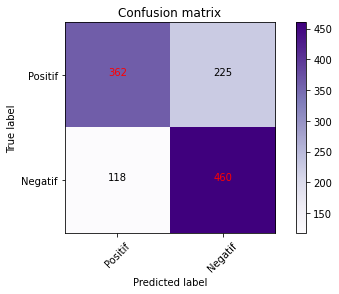

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_predrb)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_predrb))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.62      0.68       587
           1       0.67      0.80      0.73       578

    accuracy                           0.71      1165
   macro avg       0.71      0.71      0.70      1165
weighted avg       0.71      0.71      0.70      1165



## **SVM Kernel Sigmoid**

In [ ]:
start = time.time() 

svm_classifierSMSG = SVC(kernel='sigmoid', C=2.33, probability=True)
svm_classifierSMSG.fit(X_train,y_train)
y_predsg = svm_classifierSMSG.predict(X_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 16.05 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm_classifierSMSG,X_train,y_train,cv=10)
print(cv_scores)
print('Accuracy: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.52360515 0.52360515 0.48497854 0.527897   0.51072961 0.49141631
 0.53004292 0.56437768 0.53862661 0.48817204]
Accuracy: 0.518 (0.024)


In [ ]:
accusmsg = round(f1_score(y_test, y_predsg),2)
print('Akurasi dari kernel sigmoid :',accusmsg)
print(f'F1 Score is {round(f1_score(y_test, y_predsg),2)}')

Akurasi dari kernel sigmoid : 0.55
F1 Score is 0.55


Confusion matrix, without normalization


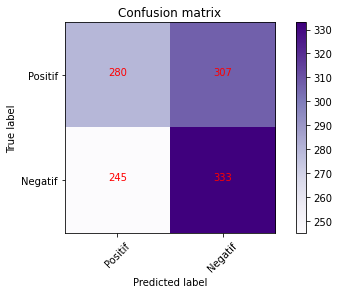

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_predsg)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_predsg))

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.48      0.50       587
           1       0.52      0.58      0.55       578

    accuracy                           0.53      1165
   macro avg       0.53      0.53      0.53      1165
weighted avg       0.53      0.53      0.53      1165



## **SVM Kernel Polynomial**

In [ ]:
start = time.time() 

svm_classifierSMPL = SVC(kernel='poly', C=2.33, probability=True)
svm_classifierSMPL.fit(X_train,y_train)
y_predpl = svm_classifierSMPL.predict(X_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 12.74 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm_classifierSMPL,X_train,y_train,cv=10)
print(cv_scores)
print('Accuracy: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.68669528 0.67811159 0.63733906 0.70600858 0.68454936 0.72961373
 0.67596567 0.69098712 0.64592275 0.66236559]
Accuracy: 0.680 (0.026)


In [ ]:
accusmpl = round(accuracy_score(y_test, y_predpl),2)
print('Akurasi dari kernel polynomial :',accusmpl)
print(f'F1 Score is {round(f1_score(y_test, y_predpl),2)}')

Akurasi dari kernel polynomial : 0.72
F1 Score is 0.74


Confusion matrix, without normalization


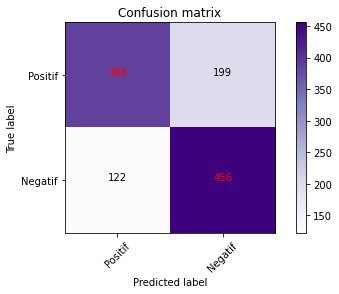

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_predpl)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_predpl))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71       587
           1       0.70      0.79      0.74       578

    accuracy                           0.72      1165
   macro avg       0.73      0.72      0.72      1165
weighted avg       0.73      0.72      0.72      1165



## **Diagram Pie**

In [ ]:
data_diagram = data.copy()

In [ ]:
data_diagram.head()

,Comment,Label,Comment_Bersih,Comment_Tokenizing
0,Kebijakan yang membuat masyarakat semakin terp...,0,kebijakan yang membuat masyarakat semakin terp...,"[bijak, masyarakat, puruk, anda, nya, obat, bl..."
1,tidak jadi buat SIM. tidak jadi perpanjang STN...,0,tidak jadi buat sim tidak jadi perpanjang stnk...,"[sim, panjang, stnk, jual, tanahgimana]"
2,Jangan kau tanyakan apa yang telah negara beri...,0,jangan kau tanyakan apa yang telah negara beri...,"[kau, negara, pada, tanya, kau, negara, kaleng..."
3,Gimana kok jadi ruwet gini...,0,gimana kok jadi ruwet gini,"[gimana, ruwet, gin]"
4,Bertambah lagi beban pengeluaran jadi punya hu...,0,bertambah lagi beban pengeluaran jadi punya hu...,"[tambah, beban, keluar, hutang, bulan, keluarga]"


In [ ]:
title_type = data_diagram.groupby('Label').agg('count')
print(title_type)

       Comment  Comment_Bersih  Comment_Tokenizing
Label                                             
0         2912            2912                2912
1          148             148                 148


In [ ]:
type_labels = title_type.Comment.sort_values().index
type_counts = title_type.Comment.sort_values()

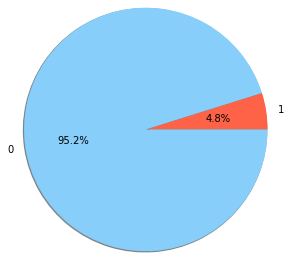

In [ ]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(4,10))
the_grid = GridSpec(2,2)

cmap = plt.get_cmap('Spectral')
cl = ['tomato', 'lightskyblue']

plt.subplot(the_grid[1,1], aspect=1)
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%2.1f%%', shadow=True, colors=cl, radius=3)
plt.show()

## **Perbandingan Akurasi**

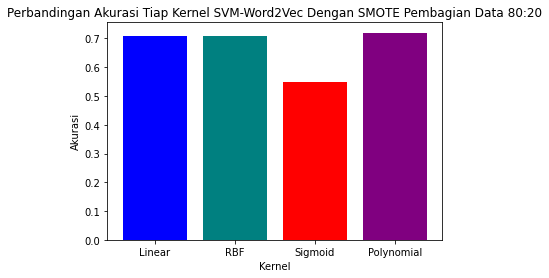

In [ ]:
kernel = ['Linear', 'RBF','Sigmoid','Polynomial']
model = [accusm,accusmrb,accusmsg,accusmpl]
ncolors = ['blue', 'teal', 'red', 'purple']

plt.bar(kernel, model, color=ncolors)
plt.title('Perbandingan Akurasi Tiap Kernel SVM-Word2Vec Dengan SMOTE Pembagian Data 80:20')
plt.xlabel('Kernel')
plt.ylabel('Akurasi')
plt.show()